In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy


In [ ]:
df=pd.read_csv(r"C:\Users\dell\Downloads\Financial Analysis\financial_data.csv")

In [4]:
df.head()


,"TransactionID,TransactionDate,OrderID,Revenue,COGS,GrossProfit,OperatingExpenses,NetProfit"
0,"TX00001,2023-09-27,1,4138.01,1655.25,2482.76,6..."
1,"TX00002,2023-03-20,2,7334.280000000001,2933.68..."
2,"TX00003,2023-08-04,3,19933.64,7973.48,11960.16..."
3,"TX00004,2023-04-10,4,17031.05,6812.36000000000..."
4,"TX00005,2023-07-28,5,4509.52,1803.860000000000..."


In [5]:
pd.set_option('display.max_columns', None)


In [6]:
df.head()

,"TransactionID,TransactionDate,OrderID,Revenue,COGS,GrossProfit,OperatingExpenses,NetProfit"
0,"TX00001,2023-09-27,1,4138.01,1655.25,2482.76,6..."
1,"TX00002,2023-03-20,2,7334.280000000001,2933.68..."
2,"TX00003,2023-08-04,3,19933.64,7973.48,11960.16..."
3,"TX00004,2023-04-10,4,17031.05,6812.36000000000..."
4,"TX00005,2023-07-28,5,4509.52,1803.860000000000..."


In [7]:
df.columns


Index(['TransactionID,TransactionDate,OrderID,Revenue,COGS,GrossProfit,OperatingExpenses,NetProfit'], dtype='object')

# note:
1.data is currently in a single column,  
2.use the str.split function to separate the values into different columns. 


In [8]:
df = df.iloc[:, 0].str.split(',', expand=True)


In [9]:
df.head()

,0,1,2,3,4,5,6,7
0,TX00001,2023-09-27,1,4138.01,1655.25,2482.76,631.81,1850.95
1,TX00002,2023-03-20,2,7334.280000000001,2933.6800000000003,4400.6,2778.65,1621.95
2,TX00003,2023-08-04,3,19933.64,7973.48,11960.16,2393.2,9566.96
3,TX00004,2023-04-10,4,17031.05,6812.360000000001,10218.69,97.05,10121.64
4,TX00005,2023-07-28,5,4509.52,1803.8600000000001,2705.66,2130.28,575.38


# Rename the columns

In [10]:


df.columns = ['TransactionID', 'TransactionDate', 'OrderID', 'Revenue', 'COGS', 'GrossProfit', 'OperatingExpenses', 'NetProfit']

df.head()



,TransactionID,TransactionDate,OrderID,Revenue,COGS,GrossProfit,OperatingExpenses,NetProfit
0,TX00001,2023-09-27,1,4138.01,1655.25,2482.76,631.81,1850.95
1,TX00002,2023-03-20,2,7334.280000000001,2933.6800000000003,4400.6,2778.65,1621.95
2,TX00003,2023-08-04,3,19933.64,7973.48,11960.16,2393.2,9566.96
3,TX00004,2023-04-10,4,17031.05,6812.360000000001,10218.69,97.05,10121.64
4,TX00005,2023-07-28,5,4509.52,1803.8600000000001,2705.66,2130.28,575.38


In [11]:
df.dtypes

TransactionID        object
TransactionDate      object
OrderID              object
Revenue              object
COGS                 object
GrossProfit          object
OperatingExpenses    object
NetProfit            object
dtype: object

# convert the numeric columns to numeric data type

In [12]:

numeric_cols = ['Revenue', 'COGS', 'GrossProfit', 'OperatingExpenses', 'NetProfit']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df.dtypes

TransactionID         object
TransactionDate       object
OrderID               object
Revenue              float64
COGS                 float64
GrossProfit          float64
OperatingExpenses    float64
NetProfit            float64
dtype: object

In [13]:
df.isnull().sum()

TransactionID        0
TransactionDate      0
OrderID              0
Revenue              0
COGS                 0
GrossProfit          0
OperatingExpenses    0
NetProfit            0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.columns

Index(['TransactionID', 'TransactionDate', 'OrderID', 'Revenue', 'COGS',
       'GrossProfit', 'OperatingExpenses', 'NetProfit'],
      dtype='object')

In [16]:
df.shape

(3980, 8)

In [17]:
df.TransactionID.nunique()

3980

In [18]:
df.OrderID.nunique()

3980

# questions


# 1.which month has highest and lowest total revenue

In [19]:
# Convert TransactionDate to datetime and extract month
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.strftime('%B')



In [20]:
df['Month']

0       September
1           March
2          August
3           April
4            July
          ...    
3975     February
3976     December
3977     February
3978          May
3979       August
Name: Month, Length: 3980, dtype: object

In [21]:
# Group by month and calculate total revenue
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()





In [22]:
monthly_revenue

,Month,Revenue
0,April,4710506.02
1,August,4529120.93
2,December,4142435.60
3,February,4503842.52
4,January,4406089.64
5,July,4457676.35
6,June,4303820.44
7,March,4955248.80
8,May,4431631.67
9,November,4555032.75


In [23]:
# Find the month with the highest and lowest total revenue
max_revenue_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmax()]
min_revenue_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmin()]



In [24]:
max_revenue_month

Month          March
Revenue    4955248.8
Name: 7, dtype: object

In [25]:
min_revenue_month 

Month       December
Revenue    4142435.6
Name: 2, dtype: object

In [26]:
print("Monthly Revenue:")
print(monthly_revenue)

print(f"\nMonth with the highest total revenue: {max_revenue_month['Month']} with revenue ${max_revenue_month['Revenue']:.2f}")
print(f"Month with the lowest total revenue: {min_revenue_month['Month']} with revenue ${min_revenue_month['Revenue']:.2f}")

Monthly Revenue:
        Month     Revenue
0       April  4710506.02
1      August  4529120.93
2    December  4142435.60
3    February  4503842.52
4     January  4406089.64
5        July  4457676.35
6        June  4303820.44
7       March  4955248.80
8         May  4431631.67
9    November  4555032.75
10    October  4854706.80
11  September  4584765.40

Month with the highest total revenue: March with revenue $4955248.80
Month with the lowest total revenue: December with revenue $4142435.60


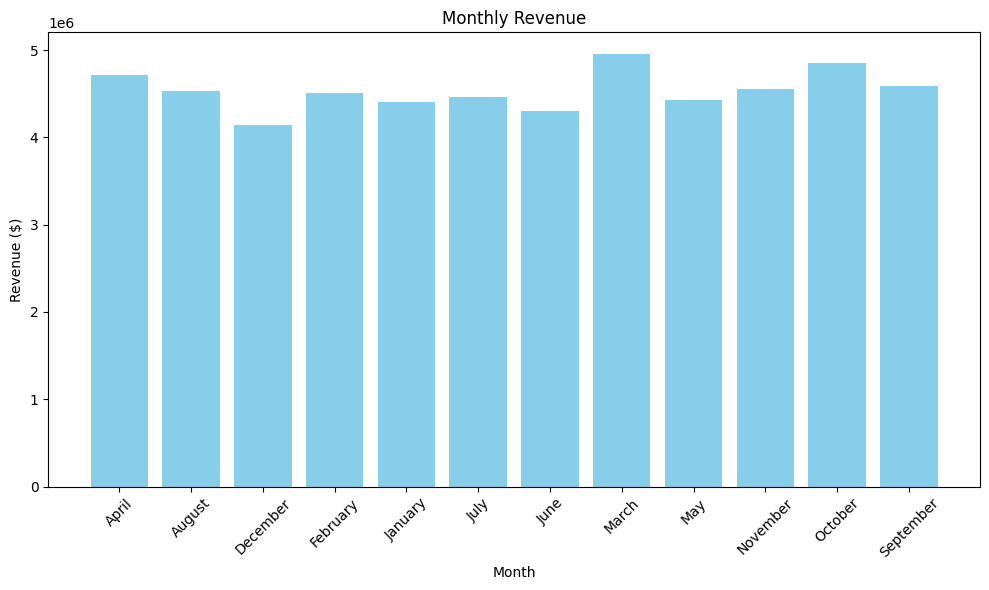

In [27]:
# Plot the monthly revenue
plt.figure(figsize=(10, 6))
plt.bar(monthly_revenue['Month'], monthly_revenue['Revenue'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.title('Monthly Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


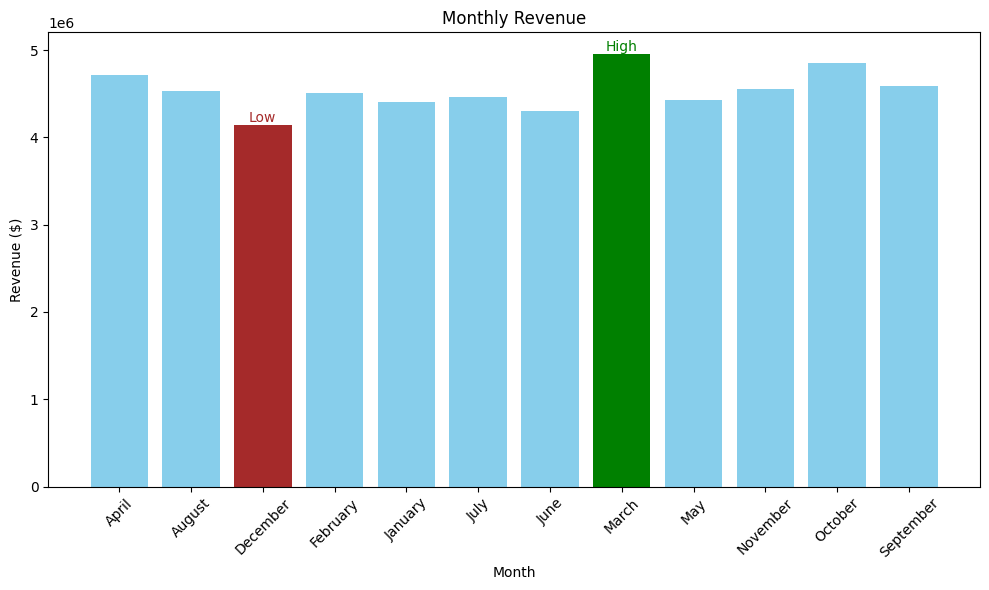

In [28]:
# Plot the monthly revenue
plt.figure(figsize=(10, 6))
colors = ['skyblue' if (month != max_revenue_month['Month'] and month != min_revenue_month['Month']) else 'green' if month == max_revenue_month['Month'] else 'brown' for month in monthly_revenue['Month']]
plt.bar(monthly_revenue['Month'], monthly_revenue['Revenue'], color=colors)
for i, row in monthly_revenue.iterrows():
    if row['Month'] == max_revenue_month['Month']:
        plt.text(row['Month'], row['Revenue'], 'High', ha='center', va='bottom', color='green')
    elif row['Month'] == min_revenue_month['Month']:
        plt.text(row['Month'], row['Revenue'], 'Low', ha='center', va='bottom', color='brown')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.title('Monthly Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 # 2.which month has the highest total cogs?

In [29]:
# Group by month and calculate total COGS
monthly_cogs = df.groupby('Month')['COGS'].sum().reset_index()

# Find the month with the highest total COGS
max_cogs_month = monthly_cogs.loc[monthly_cogs['COGS'].idxmax()]





In [30]:
monthly_cogs

,Month,COGS
0,April,1884203.80
1,August,1811651.42
2,December,1656977.32
3,February,1801537.94
4,January,1762436.84
5,July,1783072.58
6,June,1721530.86
7,March,1982100.61
8,May,1772652.06
9,November,1822011.81


In [31]:
max_cogs_month

Month         March
COGS     1982100.61
Name: 7, dtype: object

In [32]:
print("Monthly COGS:")
print(monthly_cogs)

print(f"\nMonth with the highest total COGS: {max_cogs_month['Month']} with COGS ${max_cogs_month['COGS']:.2f}")

Monthly COGS:
        Month        COGS
0       April  1884203.80
1      August  1811651.42
2    December  1656977.32
3    February  1801537.94
4     January  1762436.84
5        July  1783072.58
6        June  1721530.86
7       March  1982100.61
8         May  1772652.06
9    November  1822011.81
10    October  1941885.01
11  September  1833906.91

Month with the highest total COGS: March with COGS $1982100.61


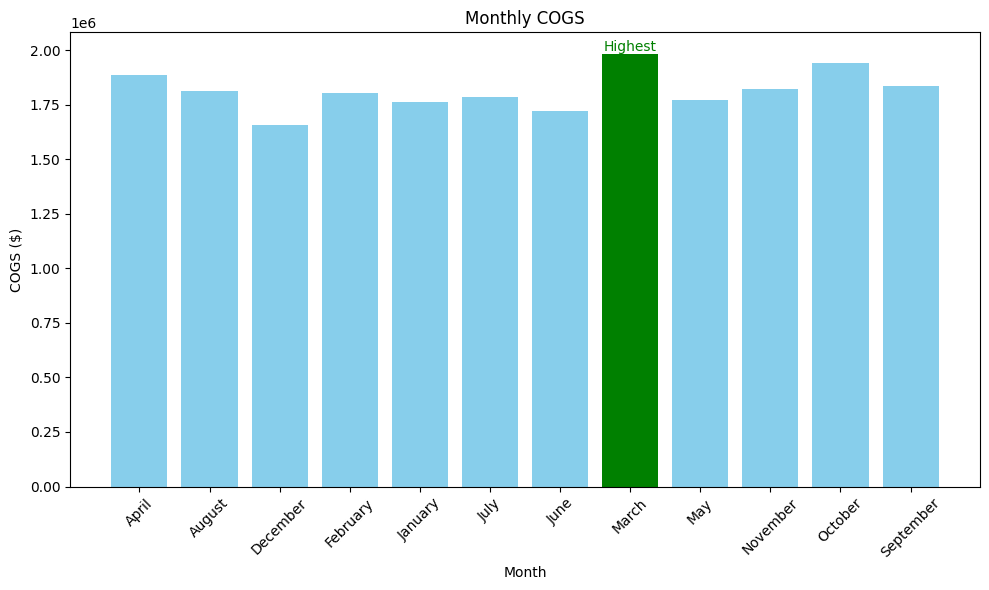

In [33]:
# Plot the monthly COGS
plt.figure(figsize=(10, 6))
colors = ['skyblue' if month != max_cogs_month['Month'] else 'green' for month in monthly_cogs['Month']]
plt.bar(monthly_cogs['Month'], monthly_cogs['COGS'], color=colors)
plt.text(max_cogs_month['Month'], max_cogs_month['COGS'], 'Highest', ha='center', va='bottom', color='green')
plt.xlabel('Month')
plt.ylabel('COGS ($)')
plt.title('Monthly COGS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3.How much total revenue and total net profit?

In [34]:
total_revenue = df['Revenue'].sum()
total_net_profit = df['NetProfit'].sum()

print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Total Net Profit: ${total_net_profit:.2f}")



Total Revenue: $54434876.92
Total Net Profit: $26610483.97


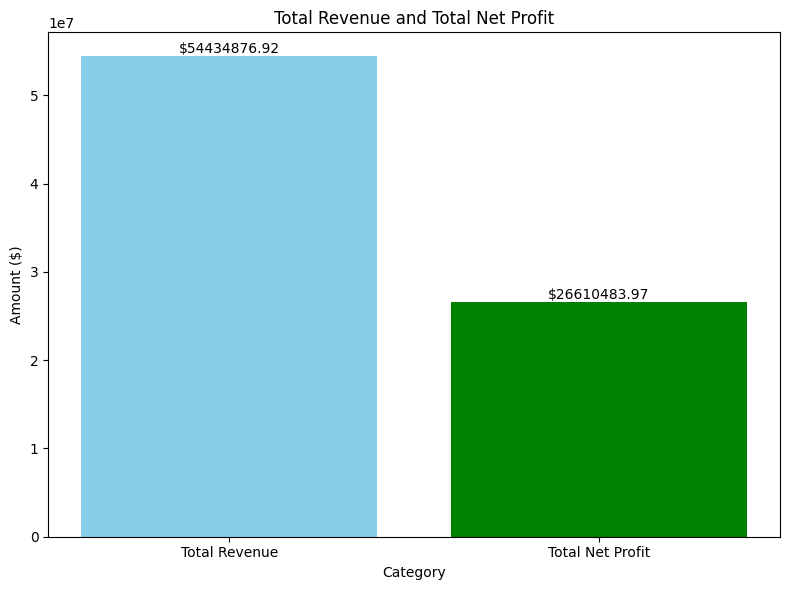

In [35]:
plt.figure(figsize=(8, 6))
plt.bar(['Total Revenue', 'Total Net Profit'], [total_revenue, total_net_profit], color=['skyblue', 'green'])
plt.text(0, total_revenue, f"${total_revenue:.2f}", ha='center', va='bottom')
plt.text(1, total_net_profit, f"${total_net_profit:.2f}", ha='center', va='bottom')
plt.xlabel('Category')
plt.ylabel('Amount ($)')
plt.title('Total Revenue and Total Net Profit')
plt.tight_layout()
plt.show()


# 4.which month has the highest total operating expenses?

In [36]:
monthly_operating_expenses = df.groupby('Month')['OperatingExpenses'].sum().reset_index()
max_operating_expenses_month = monthly_operating_expenses.loc[monthly_operating_expenses['OperatingExpenses'].idxmax()]

print("Monthly Operating Expenses:")
print(monthly_operating_expenses)

print(f"\nMonth with the highest total operating expenses: {max_operating_expenses_month['Month']} with operating expenses ${max_operating_expenses_month['OperatingExpenses']:.2f}")



Monthly Operating Expenses:
        Month  OperatingExpenses
0       April          511990.08
1      August          481463.54
2    December          496031.12
3    February          468603.27
4     January          521019.47
5        July          490816.32
6        June          490590.71
7       March          539553.26
8         May          526156.64
9    November          486131.63
10    October          524480.56
11  September          513589.19

Month with the highest total operating expenses: March with operating expenses $539553.26


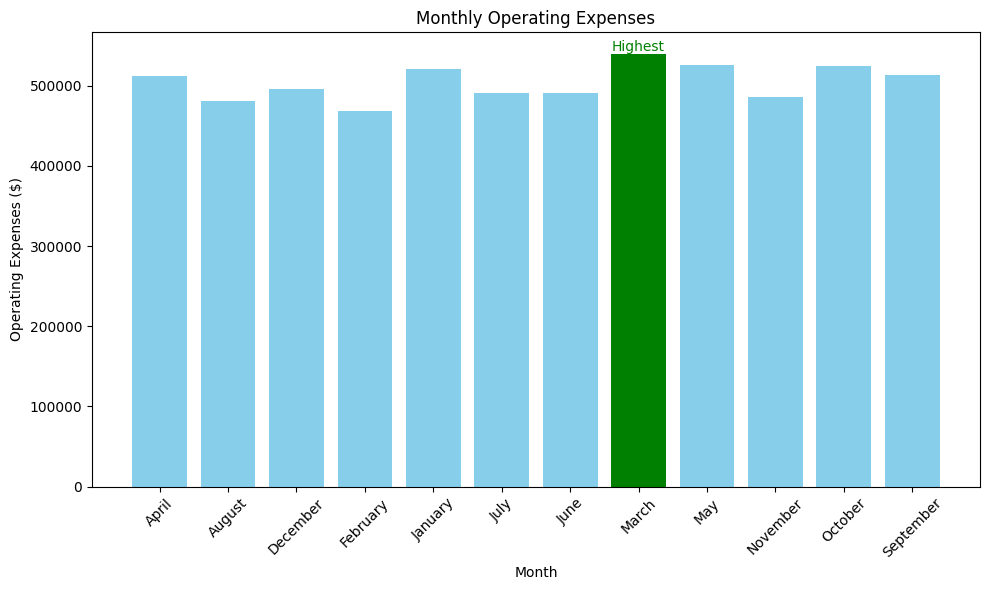

In [37]:
plt.figure(figsize=(10, 6))
colors = ['skyblue' if month != max_operating_expenses_month['Month'] else 'green' for month in monthly_operating_expenses['Month']]
plt.bar(monthly_operating_expenses['Month'], monthly_operating_expenses['OperatingExpenses'], color=colors)
plt.text(max_operating_expenses_month['Month'], max_operating_expenses_month['OperatingExpenses'], 'Highest', ha='center', va='bottom', color='green')
plt.xlabel('Month')
plt.ylabel('Operating Expenses ($)')
plt.title('Monthly Operating Expenses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
monthly_operating_expenses = df.groupby('Month')['OperatingExpenses'].sum().reset_index()
max_operating_expenses_month = monthly_operating_expenses.loc[monthly_operating_expenses['OperatingExpenses'].idxmax()]
min_operating_expenses_month = monthly_operating_expenses.loc[monthly_operating_expenses['OperatingExpenses'].idxmin()]

print("Monthly Operating Expenses:")
print(monthly_operating_expenses)

print(f"\nMonth with the highest total operating expenses: {max_operating_expenses_month['Month']} with operating expenses ${max_operating_expenses_month['OperatingExpenses']:.2f}")
print(f"Month with the lowest total operating expenses: {min_operating_expenses_month['Month']} with operating expenses ${min_operating_expenses_month['OperatingExpenses']:.2f}")



Monthly Operating Expenses:
        Month  OperatingExpenses
0       April          511990.08
1      August          481463.54
2    December          496031.12
3    February          468603.27
4     January          521019.47
5        July          490816.32
6        June          490590.71
7       March          539553.26
8         May          526156.64
9    November          486131.63
10    October          524480.56
11  September          513589.19

Month with the highest total operating expenses: March with operating expenses $539553.26
Month with the lowest total operating expenses: February with operating expenses $468603.27


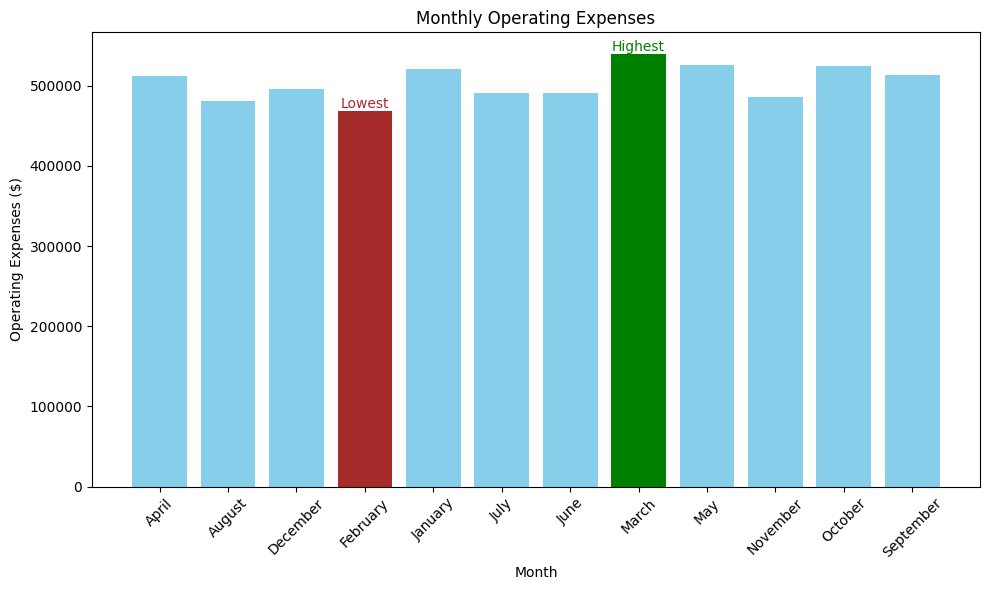

In [39]:
plt.figure(figsize=(10, 6))
colors = ['skyblue' if month not in [max_operating_expenses_month['Month'], min_operating_expenses_month['Month']] 
          else 'green' if month == max_operating_expenses_month['Month'] else 'brown' 
          for month in monthly_operating_expenses['Month']]
plt.bar(monthly_operating_expenses['Month'], monthly_operating_expenses['OperatingExpenses'], color=colors)
plt.text(max_operating_expenses_month['Month'], max_operating_expenses_month['OperatingExpenses'], 'Highest', ha='center', va='bottom', color='green')
plt.text(min_operating_expenses_month['Month'], min_operating_expenses_month['OperatingExpenses'], 'Lowest', ha='center', va='bottom', color='brown')
plt.xlabel('Month')
plt.ylabel('Operating Expenses ($)')
plt.title('Monthly Operating Expenses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 5.which month highest total gross profit

In [40]:
monthly_gross_profit = df.groupby('Month')['GrossProfit'].sum().reset_index()
max_gross_profit_month = monthly_gross_profit.loc[monthly_gross_profit['GrossProfit'].idxmax()]

print("Monthly Gross Profit:")
print(monthly_gross_profit)

print(f"\nMonth with the highest total gross profit: {max_gross_profit_month['Month']} with gross profit ${max_gross_profit_month['GrossProfit']:.2f}")



Monthly Gross Profit:
        Month  GrossProfit
0       April   2826302.22
1      August   2717469.51
2    December   2485458.28
3    February   2702304.58
4     January   2643652.80
5        July   2674603.77
6        June   2582289.58
7       March   2973148.19
8         May   2658979.61
9    November   2733020.94
10    October   2912821.79
11  September   2750858.49

Month with the highest total gross profit: March with gross profit $2973148.19


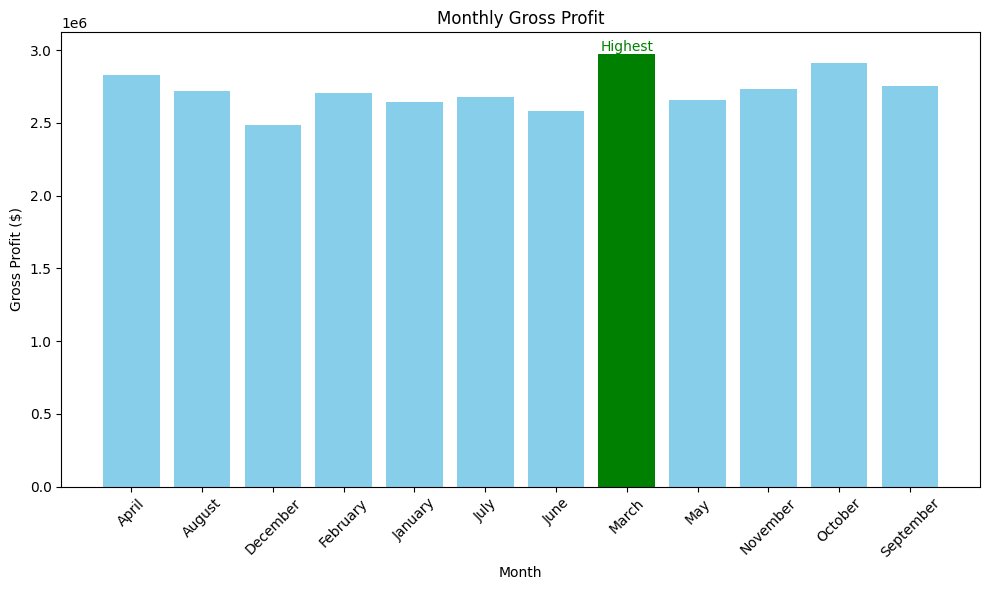

In [41]:
plt.figure(figsize=(10, 6))
colors = ['skyblue' if month != max_gross_profit_month['Month'] else 'green' for month in monthly_gross_profit['Month']]
plt.bar(monthly_gross_profit['Month'], monthly_gross_profit['GrossProfit'], color=colors)
plt.text(max_gross_profit_month['Month'], max_gross_profit_month['GrossProfit'], 'Highest', ha='center', va='bottom', color='green')
plt.xlabel('Month')
plt.ylabel('Gross Profit ($)')
plt.title('Monthly Gross Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 6.total operating expenses and total cost of goods

In [42]:
total_operating_expenses = df['OperatingExpenses'].sum()
total_cogs = df['COGS'].sum()

print(f"Total Operating Expenses: ${total_operating_expenses:.2f}")
print(f"Total Cost of Goods (COGS): ${total_cogs:.2f}")









Total Operating Expenses: $6050425.79
Total Cost of Goods (COGS): $21773967.16


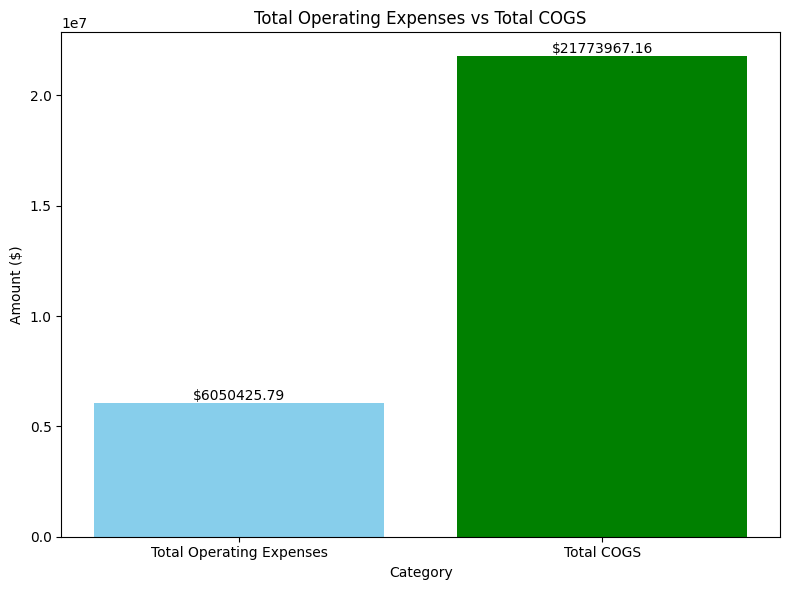

In [43]:
plt.figure(figsize=(8, 6))
plt.bar(['Total Operating Expenses', 'Total COGS'], [total_operating_expenses, total_cogs], color=['skyblue', 'green'])
plt.text(0, total_operating_expenses, f"${total_operating_expenses:.2f}", ha='center', va='bottom')
plt.text(1, total_cogs, f"${total_cogs:.2f}", ha='center', va='bottom')
plt.xlabel('Category')
plt.ylabel('Amount ($)')
plt.title('Total Operating Expenses vs Total COGS')
plt.tight_layout()
plt.show()

# 7.total cost of goods and total revenue by month

In [44]:
monthly_cogs_revenue = df.groupby('Month')[['COGS', 'Revenue']].sum().reset_index()

print("Monthly COGS and Revenue:")
print(monthly_cogs_revenue)


Monthly COGS and Revenue:
        Month        COGS     Revenue
0       April  1884203.80  4710506.02
1      August  1811651.42  4529120.93
2    December  1656977.32  4142435.60
3    February  1801537.94  4503842.52
4     January  1762436.84  4406089.64
5        July  1783072.58  4457676.35
6        June  1721530.86  4303820.44
7       March  1982100.61  4955248.80
8         May  1772652.06  4431631.67
9    November  1822011.81  4555032.75
10    October  1941885.01  4854706.80
11  September  1833906.91  4584765.40


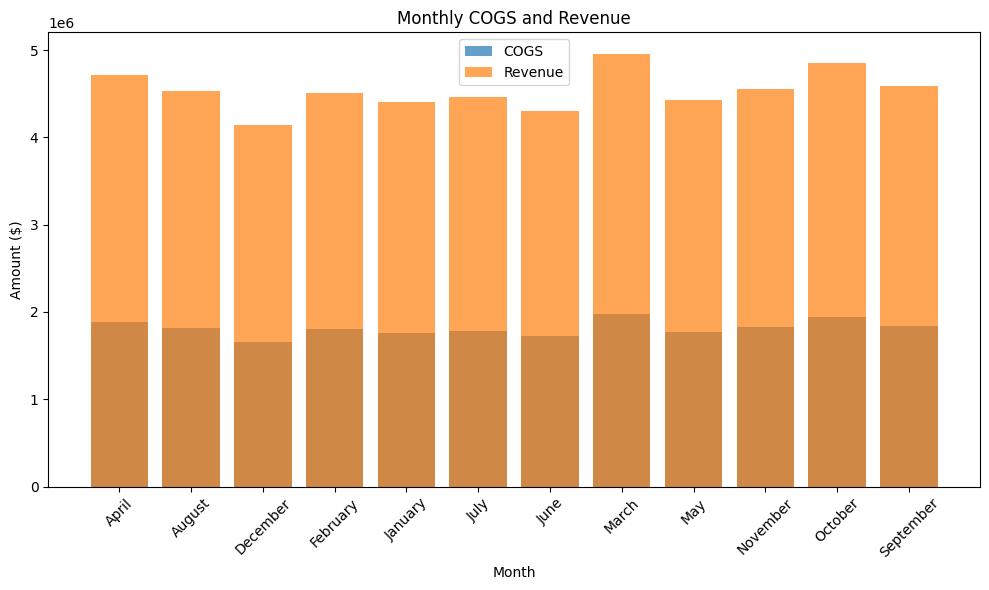

In [45]:

plt.figure(figsize=(10, 6))
plt.bar(monthly_cogs_revenue['Month'], monthly_cogs_revenue['COGS'], label='COGS', alpha=0.7)
plt.bar(monthly_cogs_revenue['Month'], monthly_cogs_revenue['Revenue'], label='Revenue', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Monthly COGS and Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


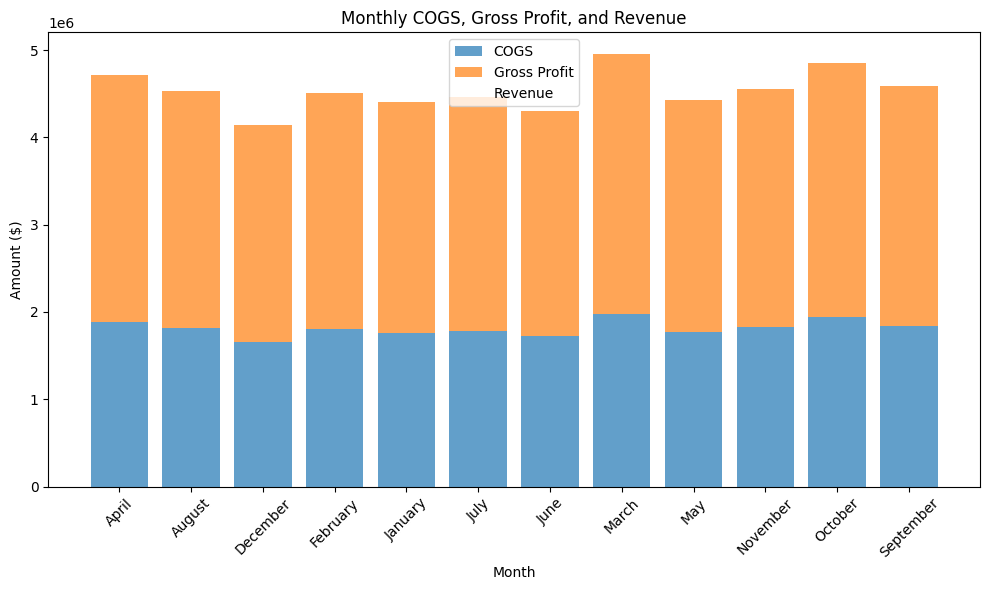

In [46]:
monthly_cogs_revenue['GrossProfit'] = monthly_cogs_revenue['Revenue'] - monthly_cogs_revenue['COGS']

plt.figure(figsize=(10, 6))
plt.bar(monthly_cogs_revenue['Month'], monthly_cogs_revenue['COGS'], label='COGS', alpha=0.7)
plt.bar(monthly_cogs_revenue['Month'], monthly_cogs_revenue['GrossProfit'], bottom=monthly_cogs_revenue['COGS'], label='Gross Profit', alpha=0.7)
plt.bar(monthly_cogs_revenue['Month'], monthly_cogs_revenue['Revenue'], label='Revenue', alpha=0, edgecolor='black', linestyle='--', linewidth=1)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Monthly COGS, Gross Profit, and Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# 8.total revenue and total gross profit

In [47]:
total_revenue = df['Revenue'].sum()
total_gross_profit = df['GrossProfit'].sum()

print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Total Gross Profit: ${total_gross_profit:.2f}")




Total Revenue: $54434876.92
Total Gross Profit: $32660909.76


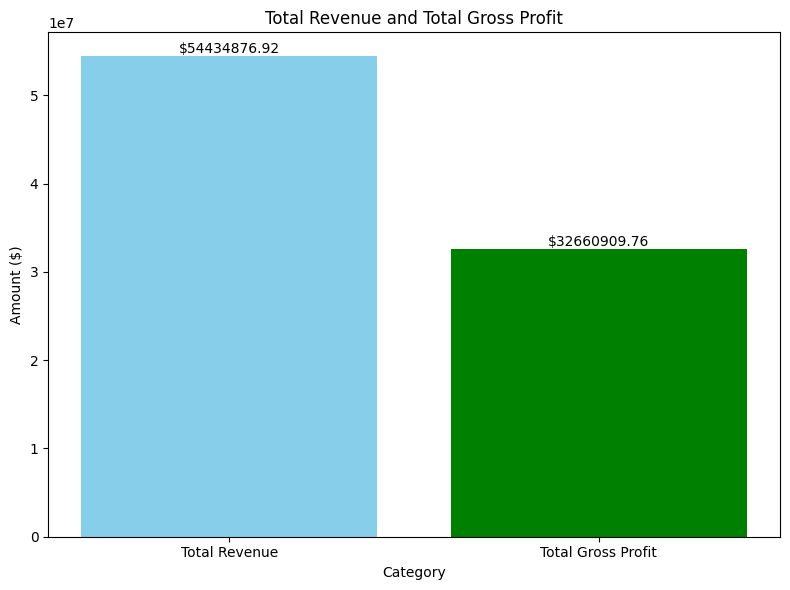

In [48]:
plt.figure(figsize=(8, 6))
plt.bar(['Total Revenue', 'Total Gross Profit'], [total_revenue, total_gross_profit], color=['skyblue', 'green'])
plt.text(0, total_revenue, f"${total_revenue:.2f}", ha='center', va='bottom')
plt.text(1, total_gross_profit, f"${total_gross_profit:.2f}", ha='center', va='bottom')
plt.xlabel('Category')
plt.ylabel('Amount ($)')
plt.title('Total Revenue and Total Gross Profit')
plt.tight_layout()
plt.show()


In [49]:
gross_profit_margin = (total_gross_profit / total_revenue) * 100
print(f"Gross Profit Margin: {gross_profit_margin:.2f}%")


Gross Profit Margin: 60.00%


In [50]:
from IPython.display import Image

Image(url='https://eventdecision.com/wp-content/uploads/2023/09/thank-you.jpg')